In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
trials_data= pd.read_csv('trials_training_data.csv')

In [15]:
trials_data

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,base_lr,epochs,...,loss/val,lr,precip_val_loss,temp_val_loss,tmax_val_loss,tmin_val_loss,total_val_loss,trial,weights,initial_weights
0,trial*_8,finished,"From the new run, it starts here",NaN,NaN,2025-07-21T17:40:41.000Z,22199,NaN,NaN,NaN,...,0.000060,0.0010,0.000005,0.000075,0.000079,0.000107,0.000059,8,"[0.3334388539928033,0.1684442201994812,0.21004...","[0.9903706241712326,0.500308243923479,0.623858..."
1,trial*_12,finished,-,NaN,NaN,2025-07-21T23:50:51.000Z,21738,NaN,NaN,NaN,...,0.000057,0.0010,0.000005,0.000075,0.000103,0.000077,0.000057,12,"[0.3133803368451625,0.12998797413702654,0.4257...","[0.5534743321013117,0.22957728583411577,0.7520..."
2,trial_0,finished,-,NaN,NaN,2025-07-20T10:31:40.000Z,17670,NaN,NaN,NaN,...,0.000054,0.0008,0.000004,0.000056,0.000084,0.000098,0.000054,0,"[0.2886978837916178,0.3378427925582116,0.16448...",NaN
3,trial_1,finished,-,NaN,NaN,2025-07-19T16:50:43.000Z,17544,NaN,0.0001,20.0,...,0.000084,0.0010,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,trial*_16,finished,-,NaN,NaN,2025-07-22T05:53:19.000Z,13301,NaN,NaN,NaN,...,0.000055,0.0010,0.000004,0.000057,0.000082,0.000108,0.000055,16,"[0.2905324276569757,0.33912427471113427,0.1544...","[0.5642289734041632,0.6585968489638253,0.29992..."
5,trial_3,finished,-,NaN,NaN,2025-07-20T15:36:19.000Z,7301,NaN,NaN,NaN,...,0.000062,0.0010,0.000005,0.000066,0.000114,0.000103,0.000059,4,"[0.36503006197686494,0.2575344108920214,0.2530...",NaN
6,trial_12,finished,-,NaN,NaN,2025-07-21T06:25:03.000Z,7198,NaN,NaN,NaN,...,0.000058,0.0008,0.000005,0.000080,0.000083,0.000096,0.000058,26,"[0.35386864319746436,0.11439642812908588,0.277...",NaN
7,trial_11,finished,-,NaN,NaN,2025-07-21T02:28:13.000Z,7129,NaN,NaN,NaN,...,0.000059,0.0010,0.000004,0.000063,0.000093,0.000090,0.000059,21,"[0.26937599450155403,0.30615865716140617,0.252...",NaN
8,trial_8,finished,-,NaN,NaN,2025-07-20T22:31:31.000Z,7123,NaN,NaN,NaN,...,0.000062,0.0010,0.000008,0.000073,0.000106,0.000084,0.000062,18,"[0.28811183843184496,0.22494157579783747,0.351...",NaN
9,trial_9,finished,-,NaN,NaN,2025-07-21T00:30:15.000Z,7076,NaN,NaN,NaN,...,0.000058,0.0008,0.000005,0.000064,0.000094,0.000081,0.000058,19,"[0.27267314701417944,0.26208159763191047,0.303...",NaN


In [20]:
trials_data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'base_lr', 'epochs', 'loss', 'loss_weights', 'max_lr', 'mode',
       'optimizer', 'optuna_trial', 'scheduler', 'RhiresD/train',
       'RhiresD/val', 'TabsD/train', 'TabsD/val', 'TmaxD/train', 'TmaxD/val',
       'TminD/train', 'TminD/val', 'best_val_loss',
       'best_val_loss_per_channel', 'epoch', 'epoch_time', 'loss/train',
       'loss/val', 'lr', 'precip_val_loss', 'temp_val_loss', 'tmax_val_loss',
       'tmin_val_loss', 'total_val_loss', 'trial', 'weights',
       'initial_weights'],
      dtype='object')

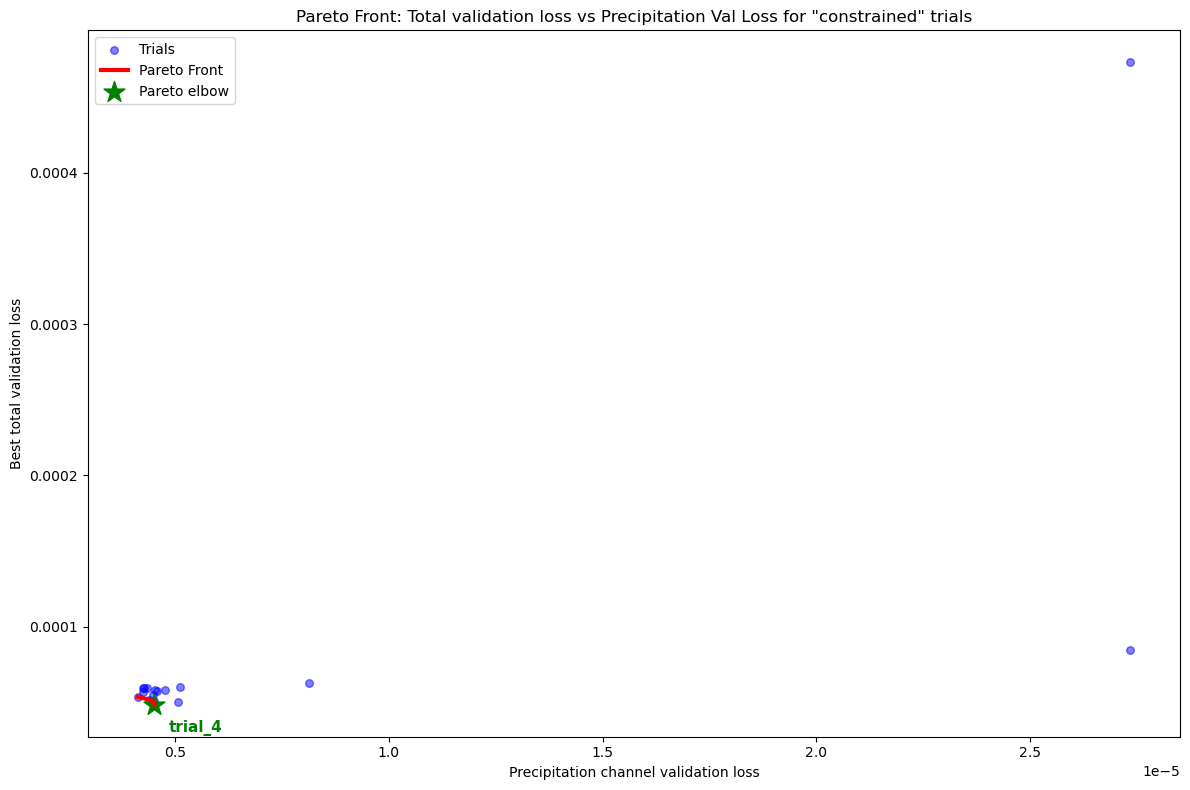

In [22]:
x = trials_data['RhiresD/val'].values
y = trials_data['best_val_loss'].values

def pareto_front_2d(x, y):
    # Sort by x (first objective)
    idx_sorted = np.argsort(x)
    pareto_idx = []
    min_y = np.inf
    for idx in idx_sorted:
        if y[idx] < min_y:
            pareto_idx.append(idx)
            min_y = y[idx]
    pareto_points = np.array(list(zip(x[pareto_idx], y[pareto_idx])))
    return pareto_points, np.array(pareto_idx)

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Trials', color='blue', alpha=0.5, s=30)
plt.plot(pareto_points[:,0], pareto_points[:,1], color='red', linewidth=3, label='Pareto Front')

# Annotate Pareto "elbow" (closest to origin)
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_name = trials_data.iloc[elbow_trial_idx]['Name']
plt.scatter(elbow_x, elbow_y, marker='*', s=250, color='green', label='Pareto elbow')
plt.annotate(f'{elbow_trial_name}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='green', fontsize=11, fontweight='bold')

plt.xlabel('Precipitation channel validation loss')
plt.ylabel('Best total validation loss')
plt.title('Pareto Front: Total validation loss vs Precipitation Val Loss for "constrained" trials')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('pareto_front_plot.png', dpi=500, bbox_inches='tight')